In [1]:
!pip install nltk
!pip install textblob
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud

C:\Users\Ertuğrul\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",200)
pd.set_option("display.float_format",lambda x:"%.2f" % x)

In [3]:
#Text PreProcessing

df=pd.read_csv("nlp/datasets/amazon_reviews.csv",sep=",")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.00,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.00,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.00,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.00,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.00,best deal around,1373673600,2013-07-13,513,0,0


In [4]:
#Normalizing Case Folding

df["reviewText"]=df["reviewText"].str.lower()
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [5]:
#Punctuations
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]"," ")

In [6]:
#Numbers
df["reviewText"]=df["reviewText"].str.replace("\d"," ")
df["reviewText"]

0                                              no issues.
1       purchased this for my device, it worked as adv...
2       it works as expected. i should have sprung for...
3       this think has worked out great.had a diff. br...
4       bought it with retail packaging, arrived legit...
                              ...                        
4910    i bought this sandisk 16gb class 10 to use wit...
4911    used this for extending the capabilities of my...
4912    great card that is very fast and reliable. it ...
4913    good amount of space for the stuff i want to d...
4914    i've heard bad things about this 64gb micro sd...
Name: reviewText, Length: 4915, dtype: object

In [7]:
#Stop Words
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ertuğrul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
sw=stopwords.words("english")
df["reviewText"]=df["reviewText"].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. sprung higher capacity. think ...
3       think worked great.had diff. bran 64gb card we...
4       bought retail packaging, arrived legit, orange...
                              ...                        
4910    bought sandisk 16gb class 10 use htc inspire, ...
4911    used extending capabilities samsung galaxy not...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    i've heard bad things 64gb micro sd card crapp...
Name: reviewText, Length: 4915, dtype: object

In [9]:
#Rare Words

temp_df=pd.Series(" ".join(df["reviewText"]).split()).value_counts()
drops=temp_df[temp_df <= 1]

df["reviewText"]=df["reviewText"].apply(lambda x: " ".join(x for x in x.split() if x not in drops))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       works expected. higher capacity. think made bi...
3       think worked 64gb card went south 3 one held p...
4       bought retail packaging, arrived legit, versio...
                              ...                        
4910    bought sandisk 16gb class 10 use htc 3 months,...
4911    used capabilities samsung galaxy note 10. grea...
4912    great card fast reliable. comes optional adapt...
4913    good amount space stuff want do, fits gopro. say?
4914    i've heard bad things 64gb micro sd card crapp...
Name: reviewText, Length: 4915, dtype: object

In [10]:
#Tokenization
#nltk.download("punkt")
from textblob import TextBlob
df["reviewText"].apply(lambda x: TextBlob(x).words).head()

0                                             [issues]
1    [purchased, device, worked, advertised, never,...
2    [works, expected, higher, capacity, think, mad...
3    [think, worked, 64gb, card, went, south, 3, on...
4    [bought, retail, packaging, arrived, legit, ve...
Name: reviewText, dtype: object

In [11]:
#Lemmatization
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ertuğrul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
df["reviewText"]= df["reviewText"].apply(lambda x : " ".join([Word(word).lemmatize() for word in x.split()]))
df["reviewText"]

0                                                 issues.
1       purchased device, worked advertised. never muc...
2       work expected. higher capacity. think made bit...
3       think worked 64gb card went south 3 one held p...
4       bought retail packaging, arrived legit, versio...
                              ...                        
4910    bought sandisk 16gb class 10 use htc 3 months,...
4911    used capability samsung galaxy note 10. greatl...
4912    great card fast reliable. come optional adapte...
4913     good amount space stuff want do, fit gopro. say?
4914    i've heard bad thing 64gb micro sd card crappi...
Name: reviewText, Length: 4915, dtype: object

In [13]:
#Text Visualization
#Terim Frekanslarının Oluşturulması

tf=df["reviewText"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

tf.columns=["words","tf"]
tf.sort_values("tf",ascending=False)

,words,tf
26,card,4130.00
15,work,1879.00
7,phone,1220.00
109,memory,1192.00
65,sd,1133.00
...,...,...
2591,"mostly,",2.00
4480,alway,2.00
2597,complaints!,2.00
5864,4.9,2.00


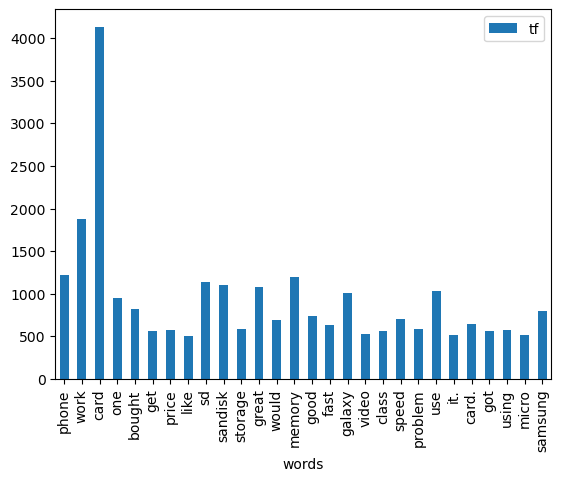

In [14]:
#Barplot

tf[tf["tf"]>500].plot.bar(x="words",y="tf")
plt.show()

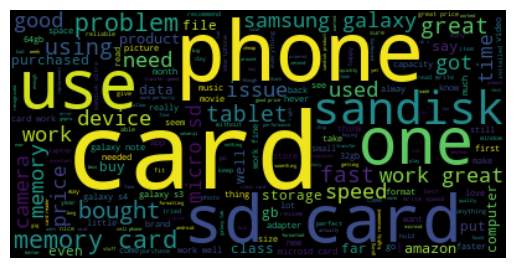

In [16]:
#WordCloud

text = " ".join(i for i in df.reviewText)

wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()


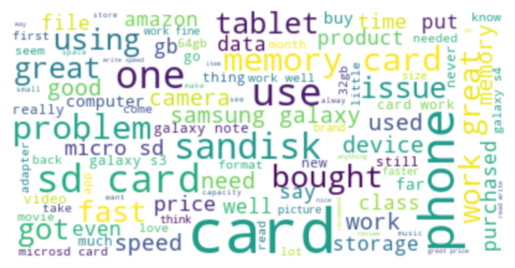

In [21]:
wordcloud2=WordCloud(max_font_size=50,
                     max_words=100,
                     background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud2,interpolation="bicubic")
plt.axis("off")
plt.show()
#wordcloud2.to_file("wordcloud.png")
#WordCloud içine collocations=False parametresini eklersek birden çok kez aynı terimi göstermez.



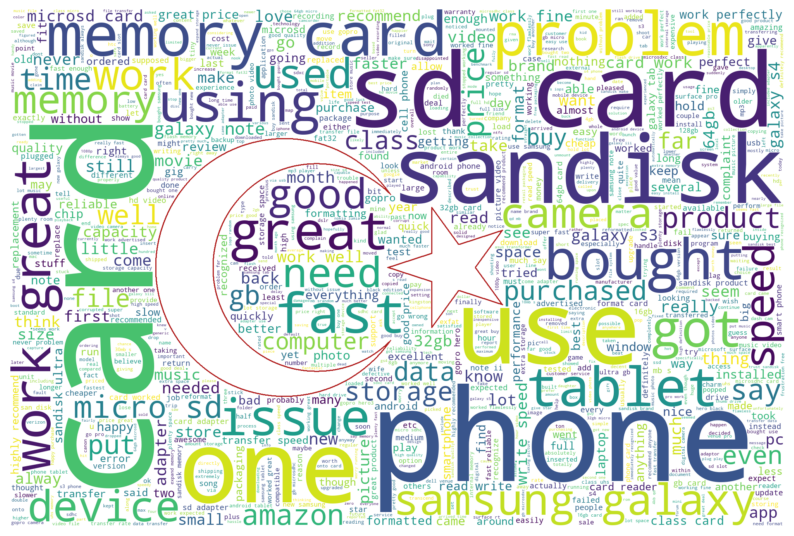

In [24]:
tr_mask=np.array(Image.open("nlp/tr.png"))

wc=WordCloud(background_color="white",
             max_words=1000,
             mask=tr_mask,
             contour_width=3,
             contour_color="firebrick")

wc.generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()